In [183]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [184]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [185]:
data.shape

(397, 6)

In [186]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [187]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [188]:
data = data.drop(columns = ['rank'])
data.head()

,discipline,yrs.since.phd,yrs.service,sex,salary
0,B,19,18,Male,139750
1,B,20,16,Male,173200
2,B,4,3,Male,79750
3,B,45,39,Male,115000
4,B,40,41,Male,141500


In [189]:
data = data.drop(columns = ['discipline'])
data.head()

,yrs.since.phd,yrs.service,sex,salary
0,19,18,Male,139750
1,20,16,Male,173200
2,4,3,Male,79750
3,45,39,Male,115000
4,40,41,Male,141500


In [190]:
data = data.drop(columns = ['sex'])
data.head()

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500


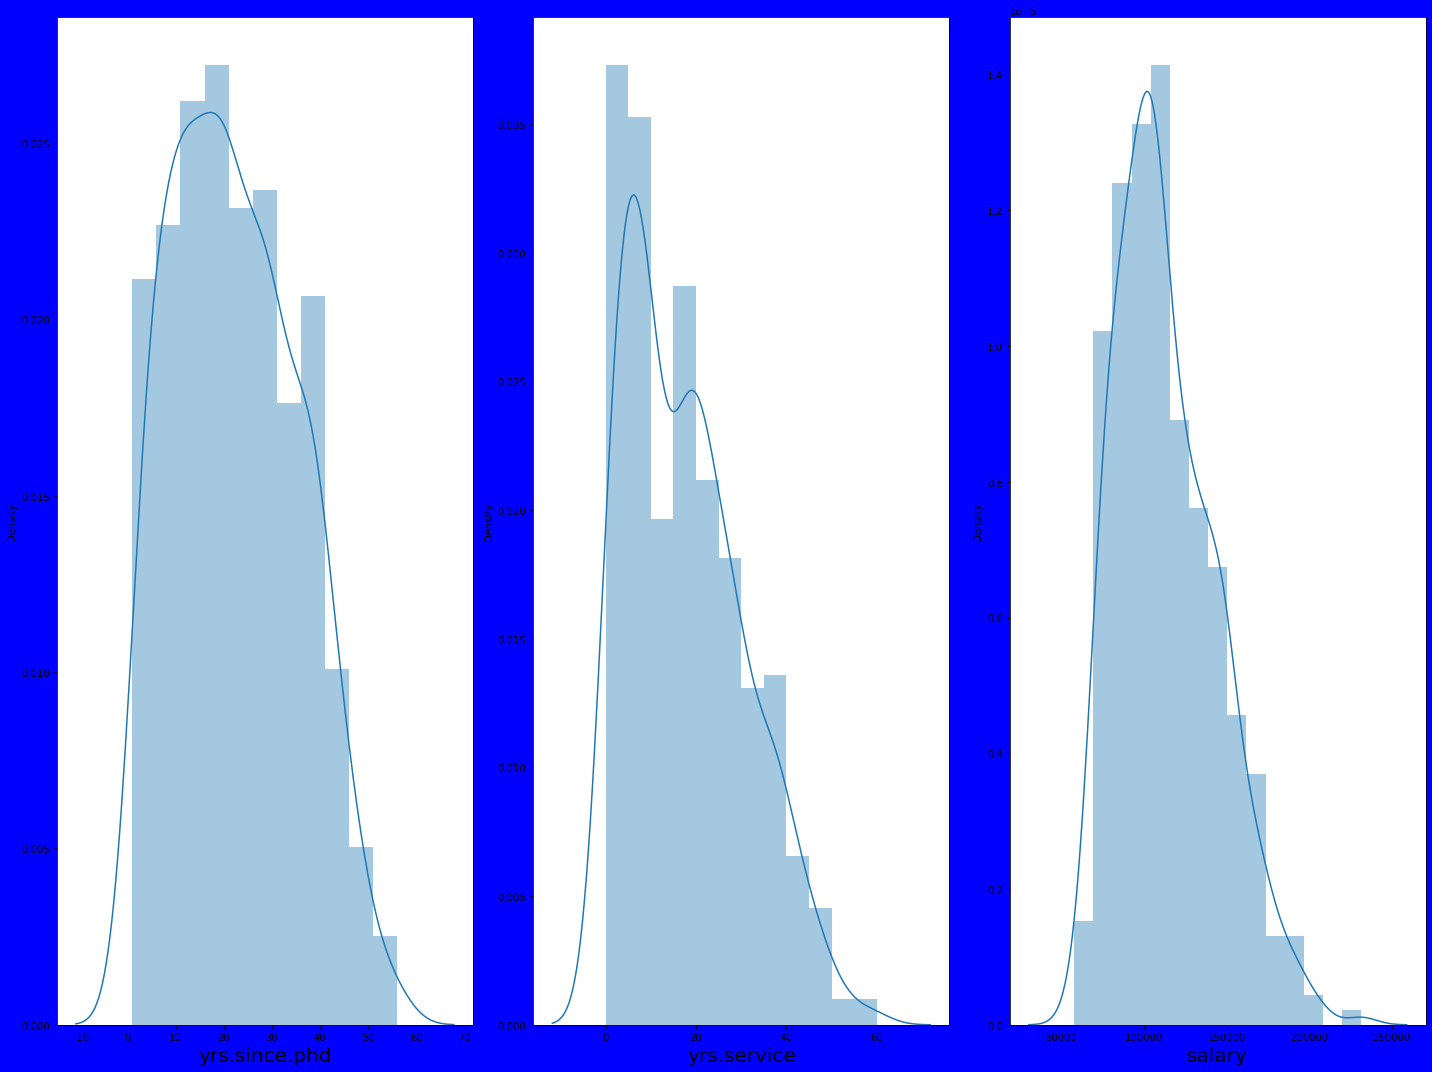

In [191]:
plt.figure(figsize=(20,15), facecolor='blue')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

In [192]:
y = data['salary']
x = data.drop(columns = ['salary'])
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [193]:
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [194]:
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.25754973,  0.02966908],
       [-0.17985426, -0.12429986],
       [-1.42298184, -1.12509795],
       [ 1.76253259,  1.64634292],
       [ 1.37405522,  1.80031186],
       [-1.26759089, -0.89414455],
       [ 0.59710048,  0.41459142],
       [ 1.76253259,  2.10824973],
       [-0.10215878,  0.18363801],
       [-0.33524521,  0.02966908],
       [-0.80141805, -0.74017561],
       [-1.18989542, -1.20208242],
       [-1.65606826, -1.27906689],
       [-1.57837279, -1.35605136],
       [-0.17985426,  0.02966908],
       [-0.80141805, -1.12509795],
       [-0.25754973,  0.18363801],
       [ 1.21866427,  1.26142058],
       [ 1.1409688 ,  0.41459142],
       [ 1.29635975,  1.41538951],
       [ 0.67479596,  0.64554483],
       [ 1.06327332,  1.03046717],
       [ 0.90788238,  0.9534827 ],
       [ 0.13092764,  0.10665355],
       [-0.72372258, -0.74017561],
       [-0.10215878, -0.74017561],
       [ 0.98557785,  0.41459142],
       [-1.34528637, -1.12509795],
       [-0.87911352,

In [195]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 49)
y_train.head()

211    111350
93     166024
252    132000
293    104800
326    124714
Name: salary, dtype: int64

In [204]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [203]:
data.tail(2)

,yrs.since.phd,yrs.service,salary
395,25,15,95329
396,8,4,81035


In [210]:
print('salary :', regression.predict(scaler.transform([[25,15]])))


salary : [118139.33620584]
